# Final position


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

import sys

sys.path.append("..")

from utils.custom_cvs import VariableTimeSeriesSplit
from utils.visualization import model_test

import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


The first objective attribute to be addressed will be the final position of each driver.


In [2]:
df = pd.read_csv("../assets/data/processed/base_model.csv")

instances_per_year = df["raceYear"].value_counts(sort=False)
instances_per_half = (
    np.array(
        list(zip(np.floor(instances_per_year / 2), np.ceil(instances_per_year / 2)))
    )
    .flatten()
    .astype(np.int32)
)

n_splits = len(instances_per_half) - 10
max_train_size = [instances_per_half[i : 10 + i].sum() for i in range(n_splits)]
test_size = instances_per_half[10:].tolist()
tscv = VariableTimeSeriesSplit(
    n_splits=n_splits, max_train_size=max_train_size, test_size=test_size
)

X = pd.read_csv("../assets/data/processed/base_model_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=3):
CV with make_scorer(balanced_accuracy_score): 0.10280139683548774
CV with neg_mean_absolute_error: -5.11305366269082
              precision    recall  f1-score   support

           1       0.35      0.63      0.45       252
           2       0.15      0.25      0.19       252
           3       0.10      0.16      0.12       252
           4       0.06      0.08      0.07       252
           5       0.07      0.12      0.08       252
           6       0.06      0.10      0.07       252
           7       0.07      0.11      0.08       252
           8       0.07      0.09      0.08       252
           9       0.06      0.08      0.07       252
          10       0.07      0.08      0.07       252
          11       0.07      0.08      0.07       252
          12       0.08      0.08      0.08       252
          13       0.08      0.06      0.07       252
          14       0.10      0.07      0.08       252
    

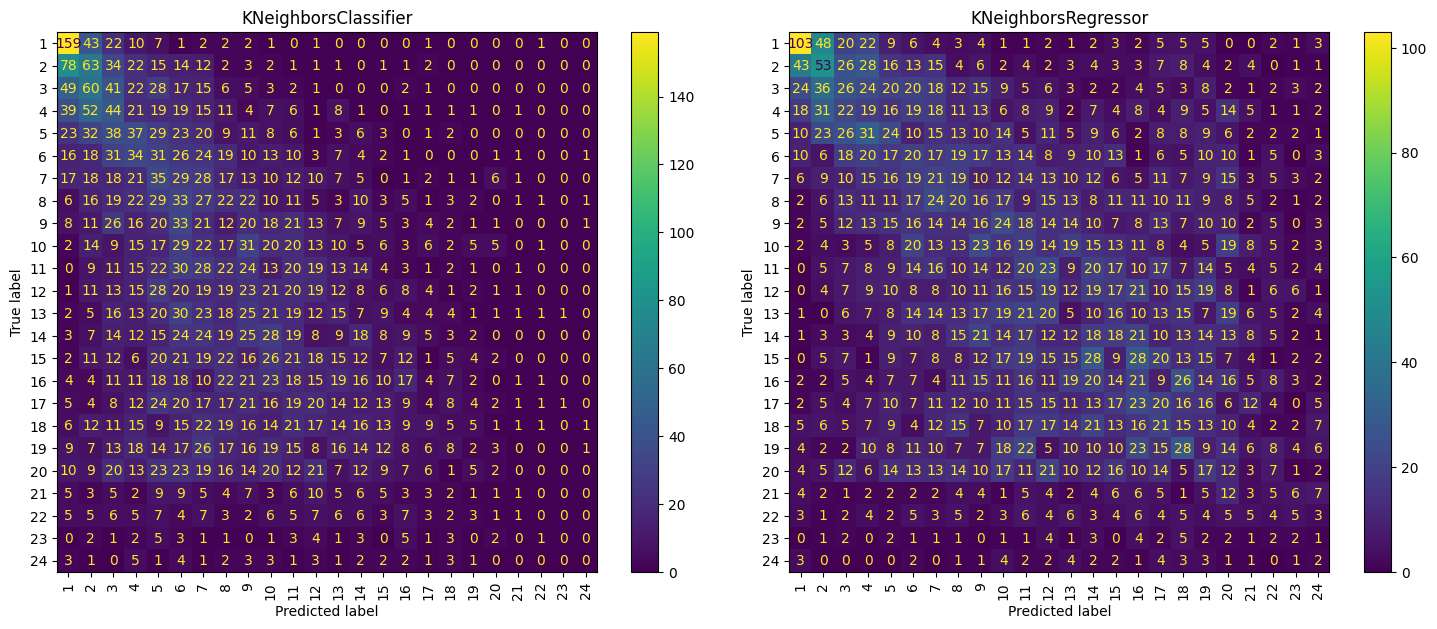

In [3]:
knn = (
    KNeighborsClassifier(n_neighbors=3, metric="euclidean", n_jobs=-1),
    KNeighborsRegressor(n_neighbors=1, metric="euclidean", n_jobs=-1),
)
model_test(knn, X, y, tscv)

## Decision Tree


DecisionTreeClassifier(criterion='entropy', max_depth=5):
CV with make_scorer(balanced_accuracy_score): 0.13193483494619856
CV with neg_mean_absolute_error: -3.8994378198992803
              precision    recall  f1-score   support

           1       0.47      0.71      0.56       252
           2       0.21      0.21      0.21       252
           3       0.17      0.28      0.21       252
           4       0.13      0.17      0.15       252
           5       0.10      0.12      0.11       252
           6       0.14      0.12      0.13       252
           7       0.10      0.17      0.12       252
           8       0.08      0.06      0.07       252
           9       0.09      0.11      0.10       252
          10       0.07      0.04      0.05       252
          11       0.05      0.09      0.06       252
          12       0.08      0.15      0.10       252
          13       0.07      0.07      0.07       252
          14       0.08      0.06      0.07       252
          15

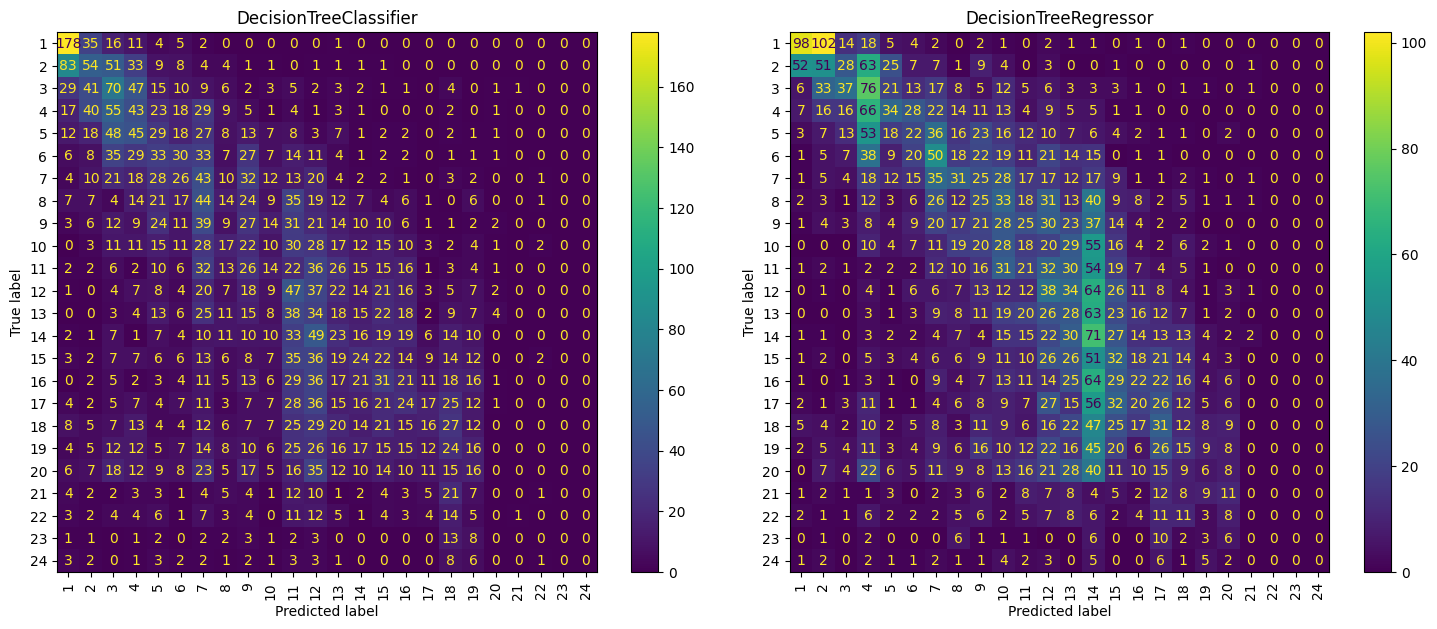

In [4]:
tree = (
    DecisionTreeClassifier(max_depth=5, criterion="entropy"),
    DecisionTreeRegressor(max_depth=4, criterion="absolute_error"),
)
model_test(tree, X, y, tscv)

## Random Forest


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       n_jobs=-1):
CV with make_scorer(balanced_accuracy_score): 0.13024322478867933
CV with neg_mean_absolute_error: -4.021844506463648
              precision    recall  f1-score   support

           1       0.36      0.83      0.50       252
           2       0.17      0.17      0.17       252
           3       0.15      0.14      0.14       252
           4       0.12      0.12      0.12       252
           5       0.13      0.13      0.13       252
           6       0.11      0.15      0.13       252
           7       0.09      0.10      0.09       252
           8       0.06      0.07      0.06       252
           9       0.06      0.06      0.06       252
          10       0.08      0.07      0.07       252
          11       0.08      0.10      0.09       252
          12       0.08      0.13      0.10       252
          13       0.04      0.03      0.04       252
          14    

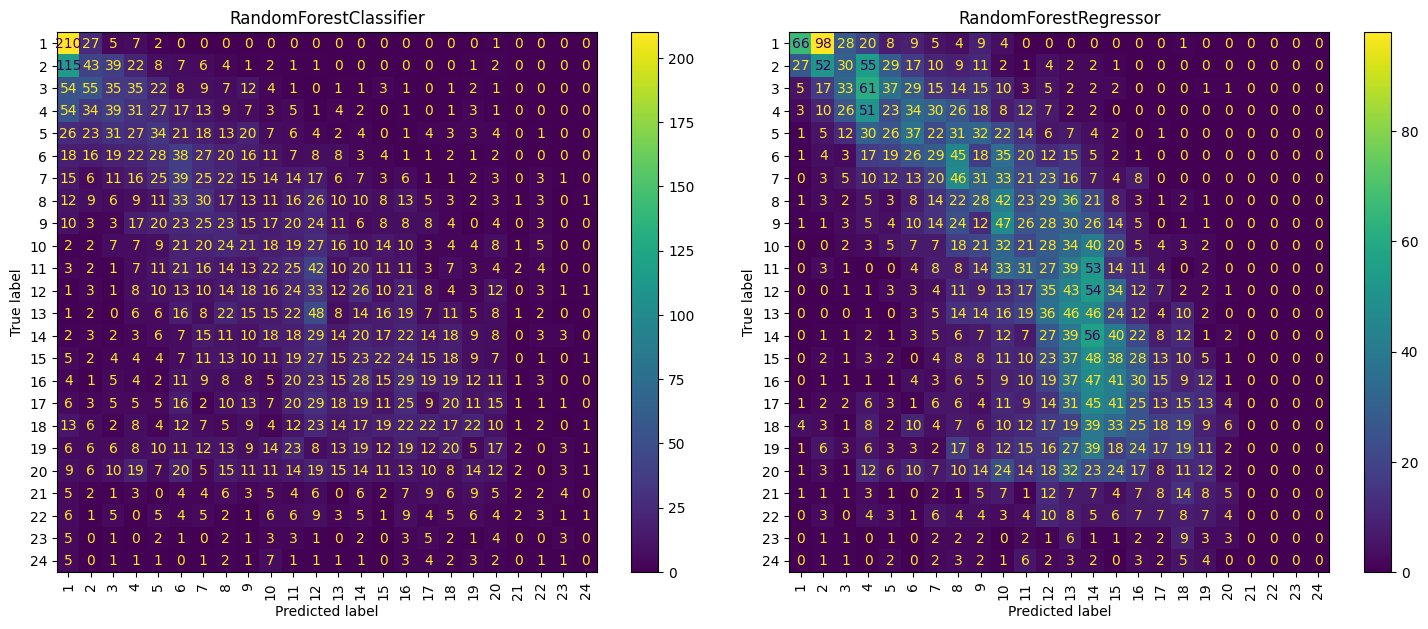

In [5]:
random_forest = (
    RandomForestClassifier(
        n_estimators=10, max_depth=5, criterion="entropy", n_jobs=-1
    ),
    RandomForestRegressor(
        n_estimators=10, max_depth=5, criterion="absolute_error", n_jobs=-1
    ),
)
model_test(random_forest, X, y, tscv)

## Multilayer Perceptron


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 25)):
CV with make_scorer(balanced_accuracy_score): 0.1447036948741494
CV with neg_mean_absolute_error: -3.648611376134196
              precision    recall  f1-score   support

           1       0.47      0.82      0.60       252
           2       0.22      0.23      0.22       252
           3       0.17      0.18      0.17       252
           4       0.16      0.16      0.16       252
           5       0.12      0.14      0.13       252
           6       0.14      0.23      0.17       252
           7       0.14      0.19      0.16       252
           8       0.07      0.06      0.06       252
           9       0.10      0.08      0.09       252
          10       0.11      0.09      0.10       252
          11       0.08      0.13      0.10       252
          12       0.09      0.10      0.09       252
          13       0.09      0.10      0.09       252
          14       0.11      0.06      0.07       252
     

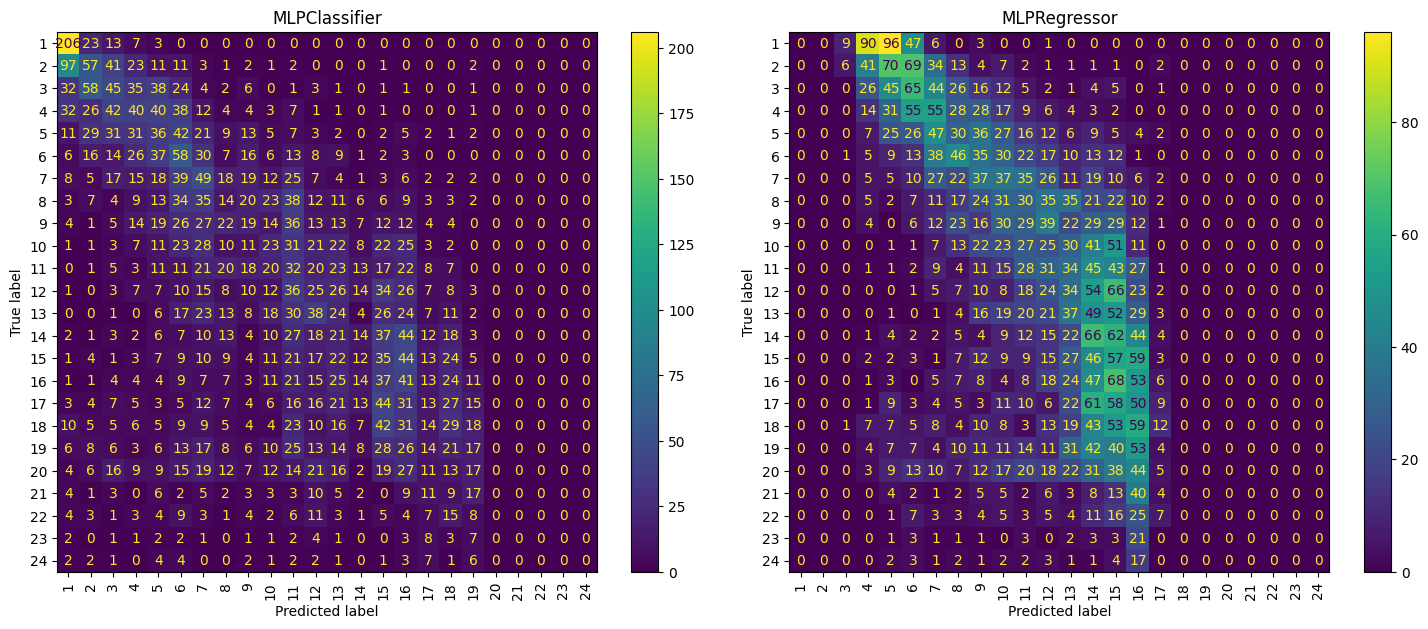

In [6]:
nn = (
    MLPClassifier(hidden_layer_sizes=(50, 25), activation="logistic"),
    MLPRegressor(hidden_layer_sizes=(60, 30), activation="logistic"),
)
model_test(nn, X, y, tscv)